### Most Popular Genre
### Top 20 Artist in Asia and Europe
### Rock vs Alternative and Punk vs Heavy Metal

Using Seaborn

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ms = pd.read_csv("Music Sales.csv")

In [9]:
ms.head(2)

,Album,Artist,Bytes,Sales,City,Company,Composer,Country,CustomerID,Email,...,MediaType,Milliseconds,Number of Records,Phone,PostalCode,Quantity,Region,State,Track,UnitPrice
0,Balls to the Wall,Accept,5.51M,3.96,Stuttgart,NaN,NaN,Germany,2,leonekohler@surfeu.de,...,Protected AAC audio file,342562,1,+49 0711 2842222,70174,4,Europe,NaN,Balls to the Wall,0.99
1,Restless and Wild,Accept,4.33M,3.96,Stuttgart,NaN,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Germany,2,leonekohler@surfeu.de,...,Protected AAC audio file,252051,1,+49 0711 2842222,70174,4,Europe,NaN,Restless and Wild,0.99


In [5]:
ms.shape

(2143, 25)

In [10]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 25 columns):
Album                2143 non-null object
Artist               2143 non-null object
Bytes                2143 non-null object
Sales                2143 non-null float64
City                 2143 non-null object
Company              364 non-null object
Composer             1573 non-null object
Country              2143 non-null object
CustomerID           2143 non-null int64
Email                2143 non-null object
FirstName            2143 non-null object
Genre                2143 non-null object
InvoiceDate          2143 non-null object
InvoiceID            2143 non-null int64
LastName             2143 non-null object
MediaType            2143 non-null object
Milliseconds         2143 non-null int64
Number of Records    2143 non-null int64
Phone                2105 non-null object
PostalCode           2003 non-null object
Quantity             2143 non-null int64
Region          

## 1) Most Popular Genre

In [15]:
ms["Genre"].count()

2143

In [27]:
#ms.Genre
#ms.Region
ms_region = ms[(ms.Region == 'Asia') | (ms.Region == 'Europe')]

In [35]:
ms_region.head(2)

,Album,Artist,Bytes,Sales,City,Company,Composer,Country,CustomerID,Email,...,MediaType,Milliseconds,Number of Records,Phone,PostalCode,Quantity,Region,State,Track,UnitPrice
0,Balls to the Wall,Accept,5.51M,3.96,Stuttgart,NaN,NaN,Germany,2,leonekohler@surfeu.de,...,Protected AAC audio file,342562,1,+49 0711 2842222,70174,4,Europe,NaN,Balls to the Wall,0.99
1,Restless and Wild,Accept,4.33M,3.96,Stuttgart,NaN,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Germany,2,leonekohler@surfeu.de,...,Protected AAC audio file,252051,1,+49 0711 2842222,70174,4,Europe,NaN,Restless and Wild,0.99


In [92]:
#ms_region[["Genre","Quantity"]]
ms_mpg = ms_region.groupby(['Genre'])[["Quantity"]].sum()

In [97]:
ms_mpg1 = ms_mpg.sort_values(by = 'Quantity',ascending=False).reset_index()
ms_mpg1

,Genre,Quantity
0,Rock,1284
1,Latin,472
2,Alternative & Punk,401
3,Metal,366
4,Jazz,108
5,Blues,92
6,TV Shows,78
7,Pop,72
8,R&B/Soul,69
9,Drama,52


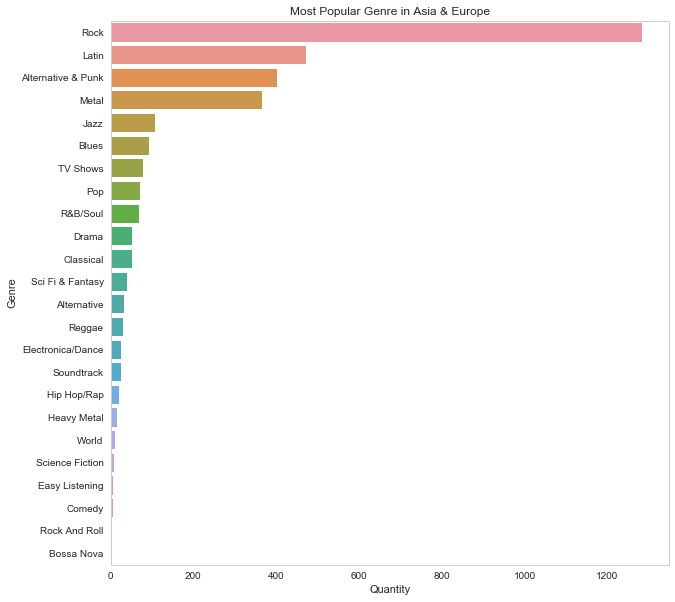

In [148]:
#plt.figure(figsize=(10,10))
ax = sns.barplot(x='Quantity', y='Genre', data=ms_mpg1)
ax.set(title='Most Popular Genre in Asia & Europe',xlabel='Quantity',ylabel='Genre');
ax.figure.set_size_inches(10,10)
ax.grid(False)

## 2) Top 20 artists in Asia and Europe

In [125]:
ms_ta = ms_region[['Artist','Genre','Quantity']]
ms_ta.head()

,Artist,Genre,Quantity
0,Accept,Rock,4
1,Accept,Rock,4
2,AC/DC,Rock,1
3,AC/DC,Rock,2
4,AC/DC,Rock,2


In [129]:
ms_ta1 = ms_ta.groupby('Artist')['Quantity'].sum().to_frame().sort_values(by='Quantity',ascending=False).reset_index().head(20)

In [231]:
ms_ta1.head()

,Artist,Quantity
0,Iron Maiden,223
1,U2,190
2,Led Zeppelin,150
3,Metallica,107
4,Creedence Clearwater Revival,78


In [135]:
ms_ta2=ms_ta.loc[ms_ta['Artist'].isin(ms_ta1['Artist'])]
ms_ta3=ms_ta2.groupby(['Artist','Genre'])['Quantity'].sum().to_frame().reset_index()
ms_ta3.head()

,Artist,Genre,Quantity
0,Creedence Clearwater Revival,Rock,78
1,Deep Purple,Rock,52
2,Faith No More,Alternative & Punk,49
3,Faith No More,Rock,16
4,Iron Maiden,Blues,9


In [136]:
df_pivot = ms_ta3.pivot(index='Artist', columns='Genre', values='Quantity')
df_pivot.head()

Genre,Alternative & Punk,Blues,Drama,Electronica/Dance,Heavy Metal,Metal,Pop,R&B/Soul,Reggae,Rock,TV Shows
Artist,,,,,,,,,,,
Creedence Clearwater Revival,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,NaN
Deep Purple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN
Faith No More,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN
Iron Maiden,NaN,9.0,NaN,NaN,15.0,120.0,NaN,NaN,NaN,79.0,NaN
Jamiroquai,NaN,NaN,NaN,13.0,NaN,NaN,NaN,21.0,NaN,16.0,NaN


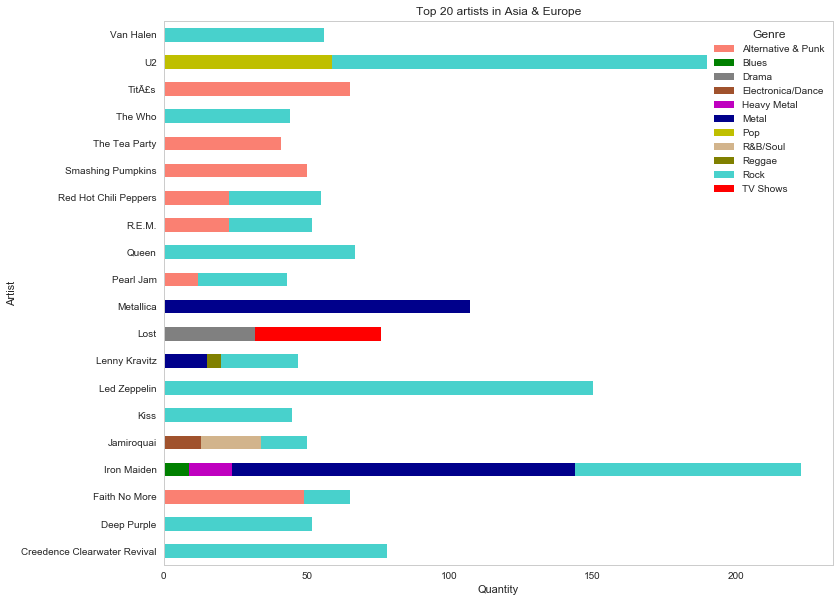

In [229]:
df_pivot.plot.barh(stacked=True, figsize=(12,10), color = ('salmon','g','gray','sienna','m','darkblue','y','tan','olive','mediumturquoise','r'))
plt.title('Top 20 artists in Asia & Europe')
plt.xlabel('Quantity')
plt.ylabel('Artist')
plt.grid(False)

## 3) Rock vs Alternative and Punk vs Heavy Metal

In [246]:
music = ms_region[(ms_region.Genre =='Rock') | (ms_region.Genre =='Alternative & Punk') | (ms_region.Genre =='Heavy Metal') ] 
df = music[['InvoiceDate','Genre','Sales']]
df.head()

,InvoiceDate,Genre,Sales
0,1/1/2008 0:00,Rock,3.96
1,1/1/2008 0:00,Rock,3.96
2,1/2/2008 0:00,Rock,0.99
3,1/2/2008 0:00,Rock,1.98
4,1/2/2008 0:00,Rock,1.98


In [247]:
#df.dtypes
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.dtypes

C:\Users\shubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


InvoiceDate    datetime64[ns]
Genre                  object
Sales                 float64
dtype: object

In [250]:
df['month'] = df['InvoiceDate'].dt.month
df['year'] = df['InvoiceDate'].dt.year
df.head()

C:\Users\shubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,InvoiceDate,Genre,Sales,month,year
0,2008-01-01,Rock,3.96,1,2008
1,2008-01-01,Rock,3.96,1,2008
2,2008-01-02,Rock,0.99,1,2008
3,2008-01-02,Rock,1.98,1,2008
4,2008-01-02,Rock,1.98,1,2008


In [252]:
df_music = df.groupby(['Genre','month','year'])['Sales'].sum().to_frame().reset_index()

In [253]:
df_music.head()

,Genre,month,year,Sales
0,Alternative & Punk,1,2009,47.52
1,Alternative & Punk,1,2010,2.97
2,Alternative & Punk,1,2012,4.95
3,Alternative & Punk,2,2010,1.98
4,Alternative & Punk,2,2011,4.95


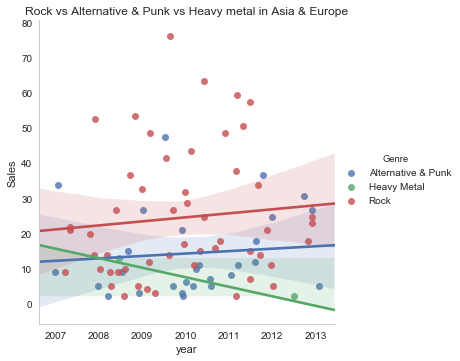

In [263]:
sns.lmplot(x='year',y = 'Sales', hue ='Genre', data =df_music, x_jitter=1.10)
ax=plt.gca()
ax.set(title='Rock vs Alternative & Punk vs Heavy metal in Asia & Europe',xlabel='year',ylabel='Sales');
ax.grid(False)